### IDs:
Insert yours IDs to the cell below

ID #1: --

ID #2: --

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 1% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 75% probability of having at least one defective product in the batch sent?
Write a function that computes this.

In [ ]:
def get_defective_from_sample(wanted_prob_defective=0.85,prob_sample=0.03):
    i = 1
    exceed = False
    while exceed == False:
        if (1-prob_sample)**i < (1-wanted_prob_defective):
            exceed = True
        else:
            i += 1
    return i
get_defective_from_sample()

63

[0.00000000e+00 7.29000000e-10 4.97178000e-09 1.93760181e-08
 5.66349807e-08 1.37952666e-07 2.95708977e-07 5.76252282e-07
 1.04275572e-06 1.77808177e-06 2.88760707e-06 4.50196638e-06
 6.77968061e-06 9.90963958e-06 1.41134152e-05 1.96473856e-05
 2.68046540e-05 3.59167513e-05 4.73551134e-05 6.15323278e-05
 7.89031463e-05 9.99652637e-05 1.25259864e-04 1.55371935e-04
 1.90930364e-04 2.32607806e-04 2.81120349e-04 3.37226970e-04
 4.01728804e-04 4.75468222e-04 5.59327740e-04 6.54228760e-04
 7.61130168e-04 8.81026778e-04 1.01494766e-03 1.16395433e-03
 1.32913887e-03 1.51162191e-03 1.71255052e-03 1.93309612e-03
 2.17445217e-03 2.43783196e-03 2.72446625e-03 3.03560096e-03
 3.37249472e-03 3.73641656e-03 4.12864342e-03 4.55045783e-03
 5.00314547e-03 5.48799279e-03 6.00628468e-03 6.55930213e-03
 7.14831993e-03 7.77460443e-03 8.43941134e-03 9.14398355e-03
 9.88954906e-03 1.06773189e-02 1.15084852e-02 1.23842192e-02
 1.33056694e-02 1.42739601e-02 1.52901891e-02 1.63554265e-02
 1.74707132e-02 1.863705

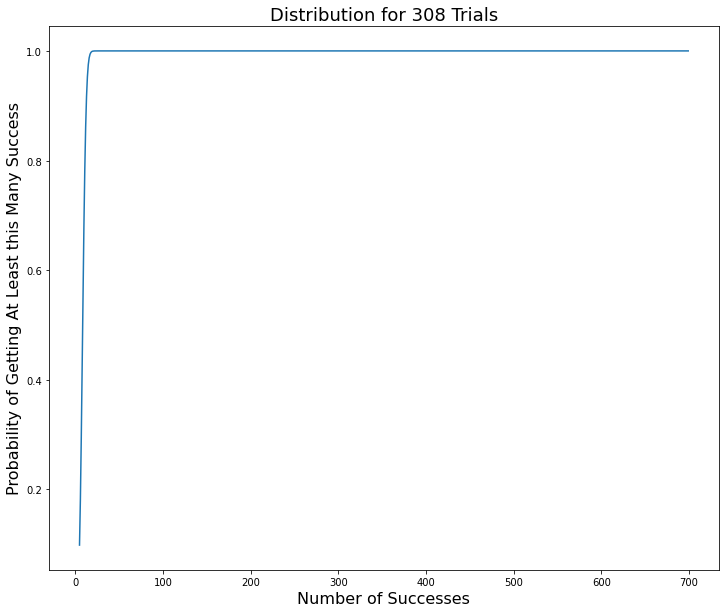

In [ ]:
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt


p = 0.03
k = 5
confidence = 0.9
n = np.arange(k, 700)

binomSurvivalDist = scipy.stats.binom.sf(k, n, p)
#print(binomSurvivalDist)
nrequired = n[binomSurvivalDist >= confidence][0]

# Plotting the results to Verify that this works
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
x = np.arange(0, nrequired+1)
ax.plot(n, scipy.stats.binom.cdf(n, nrequired, p))
ax.set_xlabel("Number of Successes", fontsize=16)
ax.set_ylabel("Probability of Getting At Least this Many Success", fontsize=16)
ax.set_title("Distribution for %i Trials" % nrequired, fontsize=18)

print(nrequired)
plt.show()

#### Answer the same question but where:
#### 1.B.1 
Products are 4% defective and we want a 95% probability of at least one defective product in the batch

In [ ]:
get_defective_from_sample(0.95,0.04)

74

#### 1.B.2
Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch

In [ ]:
def binomial_coefficient(n,k):
    up = 1
    for i in range(n):
        up = up*(i+1)
    down_left = 1
    for i in range(k):
        down_left = down_left*(i+1)
    down_right = 1
    for i in range(n-k):
        down_right = down_right*(i+1)
    return int(up/(down_left*down_right))

In [ ]:
def get_several_defective(wanted_prob_defective=0.9,prob_sample=0.1,number_of_defects=5):
    i = number_of_defects
    exceed = False
    while exceed == False:
        overall_prob = 0
        for j in range(number_of_defects):
            defects = j
            non_defects = i-defects
            overall_prob += ((1-prob_sample)**(non_defects))*((prob_sample)**(defects))*binomial_coefficient(i,defects)
        if 1-overall_prob > wanted_prob_defective:
            exceed = True
        else:
            i += 1
    return i
get_several_defective()

NameError: ignored

Later on, we found out someone already implemented this function... so that can be used as well:

In [ ]:
import scipy.stats
# We need to add to the stats function the number of defectives. therefore it is the relevant nbinom.ppf + 5
scipy.stats.nbinom.ppf(q=0.9, n=5, p=0.1, loc=0) +5


78.0

#### 1.B.3
Products are 20% defective and we want a 90% probability of at least 10 defective products in the batch

In [ ]:
get_several_defective(0.9,0.2,10)

69

In [ ]:
# We need to add to the stats function the number of defectives. therefore it is the relevant nbinom.ppf + 10
scipy.stats.nbinom.ppf(q=0.9, n=10, p=0.2, loc=0) +10

69.0

#### 1.C
Can you comment on the difference between the answer 1.B.2 and that of 1.B.3?

more variance in 1.B.3, so more probabilty mass goes to the extremes

### Question 2 - Formula

#### 2.A
Prove (you can use what you learned in class. In particular - linearity of variance for independent random variables):

$$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np\big(1+p(n-1)\big)$$

***Answer:***<br>
We know that: $$\sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = E\big(x^{2}\big) $$ <br>
And that: $$ Var(x) = E\big(x^{2}\big) - \big(E(x)\big)^{2}=np(1-p), \quad E(x) = np $$ <br>
Therefore, $$ np\big(1-p\big) = E\big(x^{2}\big)-(np)^{2} $$ <br>
$$ np\big(1-p\big) + n^{2}p^{2} = E\big(x^{2}\big) $$ <br>
$$ np\big(1-p+np\big) = np\big(1+p(n-1\big) = E\big(x^{2}\big) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} $$
Therefore, $$ g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np\big(1+p(n-1)\big)$$ <br><center>***Q.E.D***</center>

#### 2.B
Use this formula to compute  (n = 5000, p = 0.1, 0.2, 0.3). What is the complexity of this calculation, in terms of n?

In [ ]:
def second_raw_moment(n,p):
    raw_2nd_moment = n*p*(1+p*(n-1)) #O(1)
    return raw_2nd_moment

second_raw_moment(5000,0.1), second_raw_moment(5000,0.2), second_raw_moment(5000,0.3)

# after proving the formula, our calculation is O(1) and not dependant on n

(250450.00000000003, 1000800.0000000001, 2251050.0)

#### 2.C
Consider the function:
$$f(n,p) = \sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)}$$

Describe how $f(n,p)$ can be computed using a process that requires a constant number of multiplications and additions, regardless of n.
Use your process to compute the values of $f(n=10000, p=0.05, 0.1, 0.2, 0.3)$ in O(1).<br>
Explain all your steps. 
 

***Answer:***<br>
We know that: $$\sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)} = E\big(x^{3}\big) $$ <br>
And that the central 3rd moment equals: $$ E(x-E(x))^{3} = np\big(1-p\big)\big(1-2p\big), \quad E(x) = np, \quad E(x^{2}) = np\big(1+p(n-1)\big)$$ <br>
Now, i will develope  the central 3rd moment term:  $$ E(x-E(x))^{3} = E\big(x^{3}-3x^{2}*E(x)+3x*E(x^{2})-E(x^{3})\big) = $$ <br>
$$ E(x^{3})-3E(x^{2})*E(x)+3E(x)*E(x)^{2}-E(x)^{3} = $$ <br>
$$ E(x^{3}) -3*\big(np\big(1+p(n-1)\big)*\big(np\big)+3*\big(np\big)*\big(np\big)^{2}-\big(np\big)^{3}$$ <br>
Therefore, <br>
<br>$$ E(x^{3}) = np\big(1-p\big)\big(1-2p\big) +3*\big(np\big(1+p(n-1)\big)*\big(np\big)-3*\big(np\big)*\big(np\big)^{2}+\big(np\big)^{3} $$
<br><center>**I will use this formula in a fucntion inorder to answer the question.</center>**



In [ ]:
def third_raw_moment(n,p):
    raw_3rd_moment = n*p*(1-p)*(1-2*p)+3*(n*p*(1+p*(n-1)))*n*p -3*n*p*(n*p)**2+(n*p)**3 #O(1)
    return raw_3rd_moment
third_raw_moment(10000,0.05), third_raw_moment(10000,0.1), third_raw_moment(10000,0.2), third_raw_moment(10000,0.3)

(125712927.50000006, 1002700720.0000005, 8009600960.000004, 27018900840.0)

### Question 3 - Rent distributions in Randomistan



The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 
The population of SH and RG is 12K and 18K respectively. <br>
Here are some findings of the survey:
* The mean rent in SH and RG is 5100RCU and 3700RCU respectively.
* The median rent is 4000RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

We used two approaches:
    
    1. To build the distribution by hand, so that it qualifies for the criteria
    2. To write a function that takes in a distribution, and morphs it to fit the criteria

Approach 1:

RG Median:4000.0, RG Mean:3700.0, RG IQR:5400.0
SH Median:4000.0, SH Mean:5100.0, SH IQR:5350.0


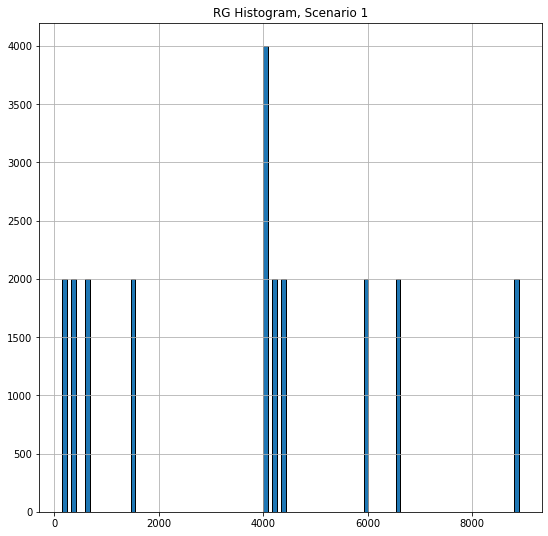

In [3]:
import pandas as pd

rg_size = 22000
rg = np.array([150,350,600,1500,4000,4000,4200,4400,6000,6600,8900] * int(rg_size/11))
rg_median = np.median(rg)
rg_mean = np.mean(rg)
rg_iqr = np.percentile(rg,75) - np.percentile(rg,25)
print("RG Median:{}, RG Mean:{}, RG IQR:{}".format(rg_median,rg_mean, rg_iqr))

sh_size = 16000
sh = np.array([50,300,3400,3650,4000,4000,6000,6900,8750,9600,9450] * int(sh_size/11))
sh_median = np.median(sh)
sh_mean = np.mean(sh)
sh_iqr = np.percentile(sh,75) - np.percentile(sh,25)
print("SH Median:{}, SH Mean:{}, SH IQR:{}".format(sh_median,sh_mean, sh_iqr))

pd.DataFrame(rg).hist(bins=100, figsize=(9,9), edgecolor="k", linewidth=1)
plt.title('RG Histogram, Scenario 1');

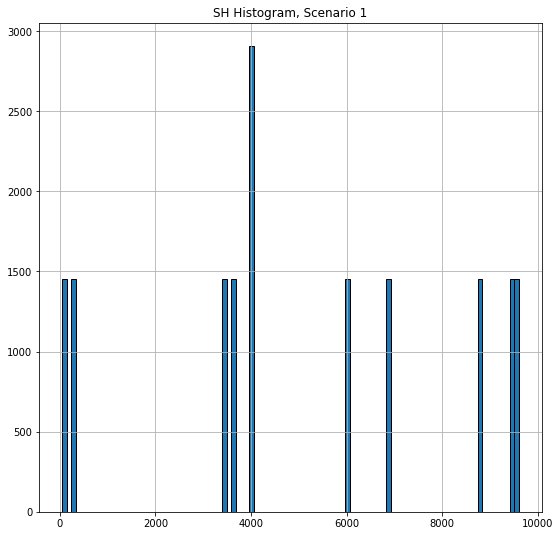

In [ ]:
pd.DataFrame(sh).hist(bins=100, 
                          figsize=(9,9),
                          edgecolor="k", linewidth=1)
plt.title('SH Histogram, Scenario 1');

In [4]:
rg_size = 18000
rg2 = np.array([150,350,600,1500,4000,4000,4200,4400,6000,6600,8900] * int(rg_size/11))
rg2_median = np.median(rg2)
rg2_mean = np.mean(rg2)
rg2_iqr = np.percentile(rg2,75) - np.percentile(rg2,25)
print("RG Median:{}, RG Mean:{}, RG IQR:{}".format(rg2_median,rg2_mean, rg2_iqr))

sh_size = 12000
sh2 = np.array([50,300,3400,3650,4000,4000,6000,6900,8750,9600,9450] * int(sh_size/11))
sh2_median = np.median(sh2)
sh2_mean = np.mean(sh2)
sh2_iqr = np.percentile(sh2,75) - np.percentile(sh2,25)
print("SH Median:{}, SH Mean:{}, SH IQR:{}".format(sh2_median,sh2_mean, sh2_iqr))

RG Median:4000.0, RG Mean:3700.0, RG IQR:5400.0
SH Median:4000.0, SH Mean:5100.0, SH IQR:5350.0


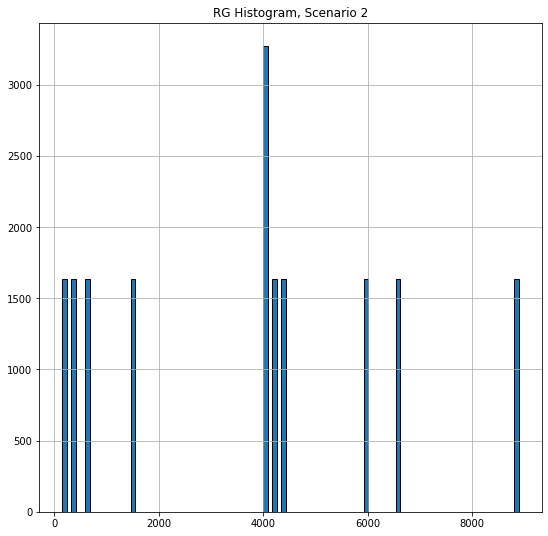

In [5]:
pd.DataFrame(rg2).hist(bins=100, 
                          figsize=(9,9),
                          edgecolor="k", linewidth=1)
plt.title('RG Histogram, Scenario 2');

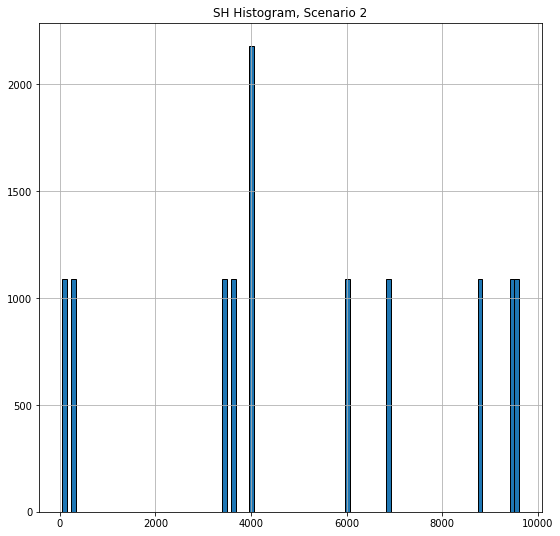

In [ ]:
pd.DataFrame(sh2).hist(bins=100, 
                          figsize=(9,9),
                          edgecolor="k", linewidth=1)
plt.title('SH Histogram, Scenario 2');

Approach 2:

In [6]:
import numpy as np
def dist_reform_upper(dist,med,mean): #input is a distribution, and it distorts it to fit!
    sorted_dist = np.sort(dist)
    dist = np.ndarray.tolist(sorted_dist)
    mid_point = int(len(dist)/2)
    current_med = dist[mid_point]
    fixed_med = []
    lower_sum = 0
    for i in dist[:mid_point]:
        fixed_med.append(i)
        lower_sum += i
    higher_sum = 0
    for i in dist[mid_point:]:
        fixed_med.append(i+med-current_med)
        higher_sum += i+med-current_med
    fixed_mean = []
    current_mean = (lower_sum+higher_sum)/len(dist)
    mean_diff = mean - current_mean
    quanta = (mean_diff/float(len(dist[mid_point+1:])))*len(dist)
    for i in fixed_med[:mid_point]:
        fixed_mean.append(i)
    fixed_mean.append(med)
    for i in fixed_med[mid_point+1:]:
        fixed_mean.append(i+quanta)
    return fixed_mean


#### 3.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

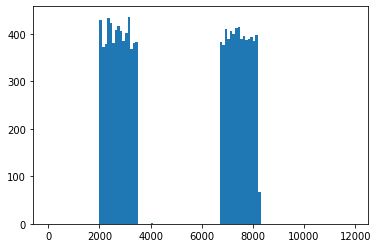

In [7]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
a = [random.randint(2000,5000) for i in range(12000)]
SH_distribution = dist_reform_upper(a,4000,5100)
b=mpl.pyplot.hist(SH_distribution, bins=[i*100 for i in range(0,120)])

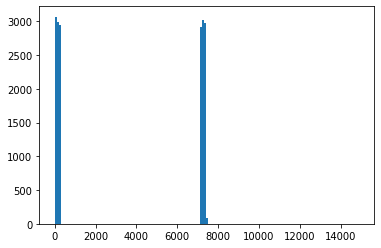

In [8]:
a = [random.randint(0,600) for i in range(18000)]
RG_distribution = dist_reform_upper(a,4000,3700)
b=mpl.pyplot.hist(RG_distribution, bins=[i*100 for i in range(0,150)])

#### 3.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG 

Approach 1:

In [9]:
import numpy as np
x = np.random.normal(loc=3700, scale=2696, size=100)
print(x)

[ 2783.02493105  6728.96524214  6267.00647973   282.39710683
  4953.67214431  6038.62769035  3773.96034977  6523.29404959
 -2755.8196784   2049.85128167  2613.89764591  3008.91577307
   594.91721113  7123.52496834  9273.68353569   863.29012465
  7379.66876189 10760.90391785  4482.11237605  1870.82340579
  5176.26774341  2813.87349504  4950.76022938  3497.80443852
  7488.64997371  2291.17602637  3647.11774913  5005.39782744
  5571.42437184  9753.81190461  2254.61455591  2843.21183207
  4195.51926289  2317.71636656  8606.32430263  3676.79947723
  7349.64423168  3456.34969568  5233.74620873  7098.1231159
  1845.06143208  5813.97817074  2517.43737116  4854.84843739
  4010.52242056  2159.25580441  5375.49955405  5297.68053026
  4613.30220706  2035.30021066  2011.38676194  1394.31540729
  3721.44718801  4760.93316196  1390.60960777  2711.80527617
  4021.24124019  4109.14000833  3925.36397975  5518.80678384
  7202.74784866  3334.17432942  2213.36943935  4152.71006307
  5344.98103597  7588.775

In [10]:
rg_size = 18000
rg3 = np.array([150,1350,1500,1600,2000,4000,4200,4400,6000,7600,8900] * int(rg_size/11))
rg3_median = np.median(rg)
rg3_mean = np.mean(rg)
rg3_iqr = np.percentile(rg,75) - np.percentile(rg,25)
print("RG Median:{}, RG Mean:{}, RG IQR:{}".format(rg_median,rg_mean, rg_iqr))

sh_size = 12000
sh3 = np.array([150,1150,3600,3650,4000,4000,5200,5900,8750,8600,10200] * int(sh_size/11))
sh3_median = np.median(sh)
sh3_mean = np.mean(sh)
sh3_iqr = np.percentile(sh3,75) - np.percentile(sh3,25)
print("SH Median:{}, SH Mean:{}, SH IQR:{}".format(sh3_median,sh3_mean, sh3_iqr))


sh3_var = np.var(sh)
rg3_var = np.var(rg)
print("RG VAR:{}, SH VAR:{}".format(rg3_var , sh3_var))

RG Median:4000.0, RG Mean:3700.0, RG IQR:5400.0
SH Median:4000.0, SH Mean:5100.0, SH IQR:5000.0
RG VAR:7266818.181818182, SH VAR:10227272.727272727


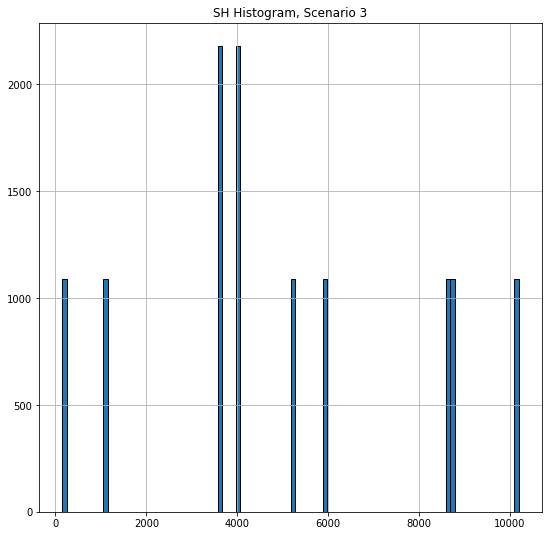

In [11]:
pd.DataFrame(sh3).hist(bins=100, 
                          figsize=(9,9),
                          edgecolor="k", linewidth=1)
plt.title('SH Histogram, Scenario 3');

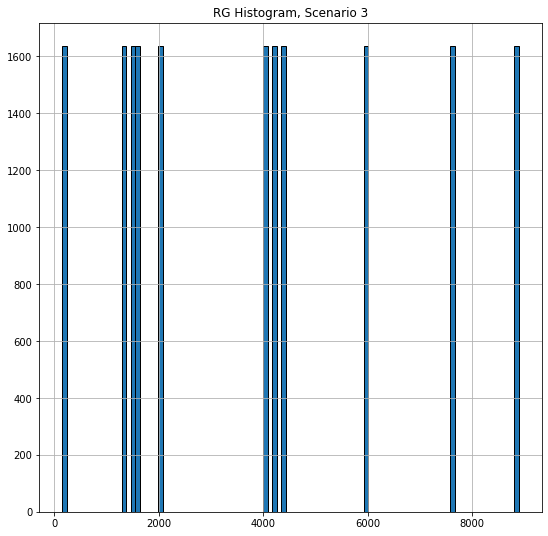

In [12]:
pd.DataFrame(rg3).hist(bins=100, 
                          figsize=(9,9),
                          edgecolor="k", linewidth=1)
plt.title('RG Histogram, Scenario 3');

Approach 2:

I added a function that increases variance, without changing the median or mean:

In [13]:
def dist_spreader(dist):
    mid_point = int(len(dist)/2)
    fixed_spread = []
    for i in dist:
        fixed_spread.append(i)
    for i in range(int(len(dist)/4)):
        point1 = random.randint(0,mid_point-1)
        point2 = random.randint(mid_point+1,len(dist)-1)
        fixed_spread[point1] = fixed_spread[point1]-fixed_spread[point1]/3.0
        fixed_spread[point2] = fixed_spread[point2]+fixed_spread[point1]/3.0
    resorted = np.sort(fixed_spread)
    fixed_spread = np.ndarray.tolist(resorted)
    return fixed_spread

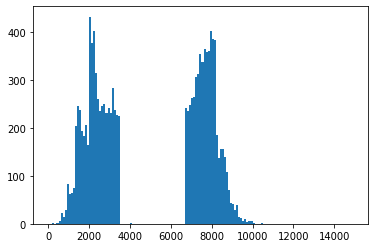

In [14]:
b=mpl.pyplot.hist(dist_spreader(SH_distribution), bins=[i*100 for i in range(0,150)])

The survey also examined the per household income (PHI) in these two places.<br>
It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500
* The median is 12000 in SH and 8000 in RG
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 3.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [15]:
sh_phi = np.array([2550,3550,5050,8050,12000,12000,14550,14600,19950,20100,25100] * int(sh_size/11))
sh_phi_median = np.median(sh_phi)
sh_phi_mean = np.mean(sh_phi)
print("SH PHI Median:{}, SH PHI Mean:{}".format(sh_phi_median,sh_phi_mean,))

rg_phi = np.array([3150,4190,4600,7650,7000,8000,9000,12500,12600,12700,12110] * int(rg_size/11))
rg_phi_median = np.median(rg_phi)
rg_phi_mean = np.mean(rg_phi)
print("RG PHI Median:{}, RG PHI Mean:{}".format(rg_phi_median,rg_phi_mean,))

SH PHI Median:12000.0, SH PHI Mean:12500.0
RG PHI Median:8000.0, RG PHI Mean:8500.0


In [16]:
#Calculating the Expected Cov(rent,PHI) base on the given a
exp_cov_sh = 0.97 * np.var(sh_phi)**0.5 * np.var(sh3)**0.5
exp_cov_rg = 0.89 * np.var(rg_phi)**0.5 * np.var(rg3)**0.5
exp_cov_rg, exp_cov_sh

(8155666.440046864, 20308337.698298804)

In [17]:
#checking the "real" cov based on the distributions
cov_sh = np.cov(sh3,sh_phi)[0,1]
cov_rg = np.cov(rg3,rg_phi)[0,1]
#the ratio shouldent be greater / smaller then 1%
cov_rg/exp_cov_rg , cov_sh/exp_cov_sh

(0.997889295321117, 0.9995385156647143)

#### 3.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selcted bining resolution.

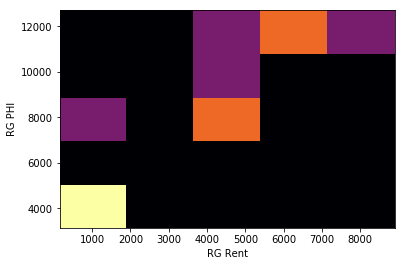

In [ ]:
plt.hist2d(x=rg,y=rg_phi,cmap='inferno',bins=5)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

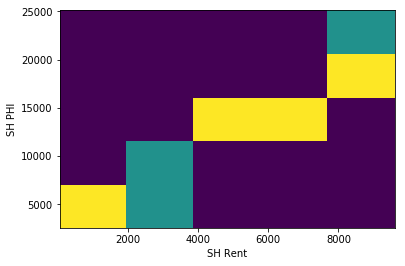

In [ ]:
plt.hist2d(x=sh,y=sh_phi,cmap='viridis',bins=5)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

### Question 4 - Covariance and independence

#### 4.A
Define two random variables X and Y over the same probability space so that<br>
* E(X) = the sum of digits of the date you were born on (sum of all in DD/MM/YYYY)
* E(Y) = the sum of the two last digits of your id number

And so that X and Y are:
* NOT correlated (Cov(X,Y) = 0) and NOT independent.

our birthdates: (17.8.1996,11.5.1990) -> E(x) = 67
sum of last 2 digits in ID: (8,10) -> E(y) = 18
our probability space will be [16,17,19,20,66,68].

P(X) = [0,0,0,0,0.5,0.5]

P(Y) = [0.25,0.25,0.25,0.25,0,0]


this is the probability table:

x/y   | 16 | 17 | 19 | 20 | 66 | 68

16    | 0  | 0  | 0  | 0  | 0  |0.25

17    | 0  | 0  | 0  | 0  |0.25| 0

19    | 0  | 0  | 0  | 0  |0.25| 0

20    | 0  | 0  | 0  | 0  | 0  |0.25

66    | 0  | 0  | 0  | 0  | 0  | 0

68    | 0  | 0  | 0  | 0  | 0  | 0


#### 4.B
Can you define random variables that are independent and so that Cov(X,Y) > 0?<br>
Explain.


no, because Cov(x,y) = E(x*y)-E(x)*E(y). Independent means that for every cell in the probability table, it's value is P(xi)*P(yi). (integer random variables are easier to explain)

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [ ]:
from scipy.stats import rv_discrete

In [ ]:
def NFoldConv(P , n):
    Q = {}
    if n == 0:
        return {}
    if n == 1:
        for i in range(len(P[0])):
            Q[P[0][i]] = P[1][i]
        return Q
    Q_2 = NFoldConv(P, n-1)
    for i in Q_2:
        for j in range(len(P[0])):
            if P[0][j]+float(i) in Q_2:
                Q[P[0][j]+float(i)] += P[1][j]*Q_2[i]
            else:
                Q[P[0][j]+float(i)] = P[1][j]*Q_2[i]
    return Q

In [ ]:
def NFoldConv(P , n):
    if n == 1:
        return P
    if n == 2:
        return conpair(P,P)
    z = conpair(P,P)
    for i in range(n-2):
        z = conpair(z,P)
    return z

#### 5.B
Compute the distribution of the sum of the results of rolling a fair dice 8 times

In [ ]:
P = rv_discrete(values=([1,2,3,4],[1/4,1/4,1/4,1/4]))
NFoldConv([[-1,0,1,2,3],[0.2,0.25,0.35,0.05,0.15]], 2) #after 2 days

{-2.0: 0.04000000000000001,
 -1.0: 0.1,
 0.0: 0.2025,
 1.0: 0.195,
 2.0: 0.2075,
 3.0: 0.10999999999999999,
 4.0: 0.1075,
 5.0: 0.015,
 6.0: 0.0225}

In [ ]:
NFoldConv([[1,2,3,4,5,6],[1.0/6 for i in range(6)]], 4)

{4.0: 0.0007716049382716049,
 5.0: 0.0030864197530864196,
 6.0: 0.007716049382716049,
 7.0: 0.015432098765432098,
 8.0: 0.02700617283950617,
 9.0: 0.043209876543209874,
 10.0: 0.061728395061728385,
 11.0: 0.08024691358024691,
 12.0: 0.0964506172839506,
 13.0: 0.10802469135802469,
 14.0: 0.11265432098765431,
 15.0: 0.10802469135802469,
 16.0: 0.0964506172839506,
 17.0: 0.08024691358024691,
 18.0: 0.06172839506172839,
 19.0: 0.04320987654320989,
 20.0: 0.02700617283950617,
 21.0: 0.015432098765432098,
 22.0: 0.007716049382716049,
 23.0: 0.0030864197530864196,
 24.0: 0.0007716049382716049}

In [ ]:
print({4: 0.0007716049382716049, 5: 0.0030864197530864196, 6: 0.007716049382716049, 7: 0.015432098765432098, 8: 0.02700617283950617, 9: 0.043209876543209874, 10: 0.061728395061728385, 11: 0.08024691358024691, 12: 0.0964506172839506, 13: 0.10802469135802469, 14: 0.11265432098765431, 15: 0.10802469135802469, 16: 0.0964506172839506, 17: 0.08024691358024691, 18: 0.06172839506172839, 19: 0.04320987654320989, 20: 0.02700617283950617, 21: 0.015432098765432098, 22: 0.007716049382716049, 23: 0.0030864197530864196, 24: 0.0007716049382716049})

{4: 0.0007716049382716049, 5: 0.0030864197530864196, 6: 0.007716049382716049, 7: 0.015432098765432098, 8: 0.02700617283950617, 9: 0.043209876543209874, 10: 0.061728395061728385, 11: 0.08024691358024691, 12: 0.0964506172839506, 13: 0.10802469135802469, 14: 0.11265432098765431, 15: 0.10802469135802469, 16: 0.0964506172839506, 17: 0.08024691358024691, 18: 0.06172839506172839, 19: 0.04320987654320989, 20: 0.02700617283950617, 21: 0.015432098765432098, 22: 0.007716049382716049, 23: 0.0030864197530864196, 24: 0.0007716049382716049}


Let us plot the results:

In [ ]:
def show_graph(dist,low,high):
    prob_array = []
    for i in range(low,high+1):
        prob_array.append(dist[float(i)])
    plt.plot([i for i in range(low,high+1)], prob_array)

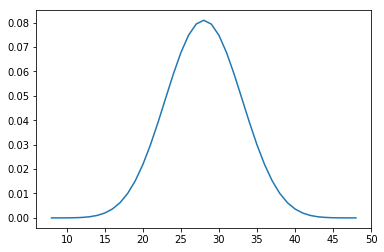

In [ ]:
show_graph(NFoldConv([[1,2,3,4,5,6],[1.0/6 for i in range(6)]], 8),8,48)

#### 5.C
Assume that the price of a stock changes in any given day according to (in NIS):
$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.2 & 0.25 & 0.35 & 0.05 & 0.15
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [ ]:
NFoldConv([[-1,0,1,2,3],[0.2,0.25,0.35,0.05,0.15]], 5) #after 5 days

{-5.0: 0.00032000000000000013,
 -4.0: 0.0020000000000000005,
 -3.0: 0.007800000000000002,
 -2.0: 0.020650000000000005,
 -1.0: 0.04315625000000001,
 0.0: 0.07215156250000002,
 1.0: 0.1033984375,
 2.0: 0.12629218749999999,
 3.0: 0.1382890625,
 4.0: 0.1320890625,
 5.0: 0.11618343749999999,
 6.0: 0.08894218749999999,
 7.0: 0.06463906249999998,
 8.0: 0.039517187499999995,
 9.0: 0.0242078125,
 10.0: 0.011269062499999998,
 11.0: 0.006079687499999999,
 12.0: 0.0018421874999999999,
 13.0: 0.0009703125,
 14.0: 0.00012656249999999997,
 15.0: 7.59375e-05}

In [ ]:
NFoldConv([[-1,0,1,2,3],[0.2,0.25,0.35,0.05,0.15]], 8)

{-8.0: 2.5600000000000013e-06,
 -7.0: 2.5600000000000012e-05,
 -6.0: 0.00014784000000000005,
 -5.0: 0.0005987200000000003,
 -4.0: 0.0018931800000000008,
 -3.0: 0.004899020000000002,
 -2.0: 0.010766297500000004,
 -1.0: 0.020529991250000004,
 0.0: 0.0346374775390625,
 1.0: 0.052333428437499996,
 2.0: 0.07167031640624999,
 3.0: 0.08958145031249998,
 4.0: 0.103027736328125,
 5.0: 0.10940744281249998,
 6.0: 0.10793554078124998,
 7.0: 0.09899090468749998,
 8.0: 0.08486815558593748,
 9.0: 0.067849849375,
 10.0: 0.05091936281249999,
 11.0: 0.035612688125,
 12.0: 0.023463143593749992,
 13.0: 0.014322670624999997,
 14.0: 0.008281080312499998,
 15.0: 0.004367155624999999,
 16.0: 0.002211449335937499,
 17.0: 0.0009830371874999997,
 18.0: 0.00043654078124999993,
 19.0: 0.0001545665625,
 20.0: 6.1161328125e-05,
 21.0: 1.51115625e-05,
 22.0: 5.58140625e-06,
 23.0: 6.834374999999999e-07,
 24.0: 2.5628906249999996e-07}

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 7NIS?

In [ ]:
after_five_days = NFoldConv([[-1,0,1,2,3],[0.2,0.25,0.35,0.05,0.15]], 5)
prob_more_than_7 = 0
prob_less_than_7 = 0
for i in after_five_days:
    if int(i) > 7:
        prob_more_than_7 += after_five_days[i]
    if int(i) < 7:
        prob_less_than_7 += after_five_days[i]
print('probability of more than 7 is '+str(prob_more_than_7)+', probability of less than 7 is '+str(prob_less_than_7))

probability of more than 7 is 0.08408874999999998, probability of less than 7 is 0.8512721875


### Question 6 - Poisson mode

Let $X\sim{}Poi(λ)$<br>
#### 6.A
Find the mode of X and prove your calculation.

***Answer:*** <br>
We know that $ 0\leq k$ now we will try to understand the connection between $p_{k-1}$ and $p_k$: <br>
<br>$$p_k = e^{-λ}*λ^{k}/{k!} = e^{-λ} * λ^{k-1}/{(k-1)!}*λ/k = p_{k-1} * λ/k$$ <br>
<centerd>Therefore, when $λ/k > 1$ then $p_k > p_{k-1}$ and when $λ/k < 1$ then $p_k < p_{k-1}$</centerd><br>
We can see that , $p_k$ as a function of $k$ is getting larger at first and then getting smaller.<br>
<br>If $λ<1$, then $P[X=0] > P[X=1] > P[X=2]$ ... the mode is 0.<br>
If $λ>1$ is not an integer, then the mode is $\lfloorλ\rfloor$<br>
If $λ$ is an integer $n$, then $P[X=n] = P[X=n-1]$  so either $λ=n$ or $λ=n-1$ are the mode of $X$.

In [ ]:
import numpy as np
import math
def poison_mode(pois_lambda):
    if pois_lambda < 1:
        mode = 0
    elif (pois_lambda - np.int(pois_lambda)) == 0:
        mode = [pois_lambda, pois_lambda-1]
    else:
        mode = math.floor(pois_lambda)
    return mode

#calculation for the given λ
print('The mode for λ=4 is {}'.format(poison_mode(4)))

print('The mode for λ=9.3 is {}'.format(poison_mode(9.3)))

print('The mode for λ=25.8 is {}'.format(poison_mode(25.8)))


The mode for λ=4 is [4, 3]
The mode for λ=9.3 is 9
The mode for λ=25.8 is 25


#### 6.B
Plot the pdf of $X$ for $\lambda=4, \lambda=9.3, \lambda=25.8$.<br>
Show the following quantities on your plots:
* The mode of $X$
* The median of $X$
* $\mu(X)$

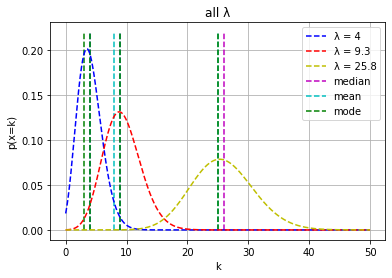

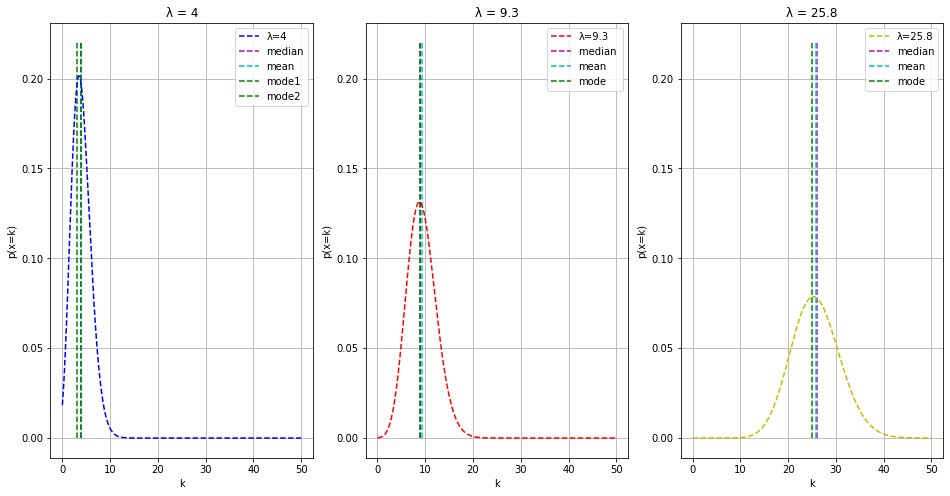

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import poisson


t = np.arange(0, 50, 0.01)

d1 = np.exp(-4)*np.power(4, t)/factorial(t)
plt.plot(t, d1, 'b', label='λ = 4',ls='--')
d2 = np.exp(-9.3)*np.power(9.3, t)/factorial(t)
plt.plot(t, d2, color='r',label = 'λ = 9.3',ls='--' )
d3 = np.exp(-25.8)*np.power(25.8, t)/factorial(t)
plt.plot(t, d3, color='y',label='λ = 25.8',ls='--')

median_lam=poisson.median(np.array([4,9.3,25.8]),loc=0)
plt.vlines(median_lam,0,0.22,colors='m', linestyles='--' , label='median') 

mean_lam = poisson.mean(np.array([4,9,25,8]), loc=0)
plt.vlines(mean_lam,0,0.22,colors='c', linestyles='--' , label='mean') 

mode_lam =np.array([3,4,9,25])
plt.vlines(mode_lam,0,0.22,colors='g', linestyles='--' , label='mode') 

plt.title("all λ")
plt.legend(); plt.xlabel('k') ; plt.ylabel('p(x=k)')
plt.grid() 
fig, axes = plt.subplots(1,3, figsize=(16,8))
axes[0].plot(t, d1, 'b', label='λ=4',ls='--')
axes[0].set_title("λ = 4")
axes[1].plot(t, d2, color='r',label = 'λ=9.3',ls='--' )
axes[1].set_title("λ = 9.3")

axes[2].plot(t, d3, color='y',label='λ=25.8',ls='--')
axes[2].set_title("λ = 25.8")

axes[0].vlines(poisson.median(4,loc=0),0,0.22,colors='m', linestyles='--' , label='median') 
axes[1].vlines(poisson.median(9.3,loc=0),0,0.22,colors='m', linestyles='--' , label='median ') 
axes[2].vlines(poisson.median(25.8,loc=0),0,0.22,colors='m', linestyles='--' , label='median') 

axes[0].vlines(poisson.mean(4,loc=0),0,0.22,colors='c', linestyles='--' , label='mean') 
axes[1].vlines(poisson.mean(9.3,loc=0),0,0.22,colors='c', linestyles='--' , label='mean') 
axes[2].vlines(poisson.mean(25.8,loc=0),0,0.22,colors='c', linestyles='--' , label='mean') 

axes[0].vlines(4,0,0.22,colors='g', linestyles='--' , label='mode1') 
axes[0].vlines(3,0,0.22,colors='g', linestyles='--' , label='mode2') 
axes[1].vlines(9,0,0.22,colors='g', linestyles='--' , label='mode') 
axes[2].vlines(25,0,0.22,colors='g', linestyles='--' , label='mode') 

axes[0].legend() ; axes[0].set_xlabel('k') ; axes[0].set_ylabel('p(x=k)')
axes[1].legend();  axes[1].set_xlabel('k'); axes[1].set_ylabel('p(x=k)')
axes[2].legend(); axes[2].set_xlabel('k'); axes[2].set_ylabel('p(x=k)')
plt.grid()

plt.grid()
axes[0].grid()
axes[1].grid()
axes[2].grid()

plt.show()

In [ ]:
import pracpred.prob as ppp
d6 = ppp.ProbDist(range(1,7))

ModuleNotFoundError: ignored

In [ ]:
median = 4600
mean = 6300
rent_list = [median for i in range(100)] 
p_decrease = .1

for i in range(1,(len(rent_list)//2)):
    rent_list[i] = round(rent_list[i - 1] - (rent_list[i - 1]*p_decrease))

rent_list.sort()

p_increase = .03    

for i in range((len(rent_list)//2),len(rent_list)-11):
    rent_list[i] = round(rent_list[i - 1] + (rent_list[i - 1]*p_increase))
    
compound_sum = 0
for i in range(10):
    compound_sum += (1 + p_increase)**i 
    
rent_list[89] = ((mean*100) - sum(rent_list[:len(rent_list)-11])) / compound_sum

for i in range(len(rent_list)-10, len(rent_list)):
    rent_list[i] = rent_list[i - 1]*(1 + p_increase)
    
print(np.mean(rent_list))

6583.691964459157
